# 1. Data Exploration

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
import plotly.express as px
%matplotlib inline

In [2]:
start_time = time.time()

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ZCTan762/enterprise_datascience_project/main/winemag-data-130k-v2.csv\
?token=GHSAT0AAAAAABQLJYN4CUJOWPUXS44A667AYQPUXYQ',index_col=0)

## 1.1 Drop Duplicates

In [5]:
df[df.duplicated('description',keep=False)].sort_values('description').head(5)

country                                        description  \
67614       US  100% Malbec, it's redolent with dark plums, wi...   
46540       US  100% Malbec, it's redolent with dark plums, wi...   
119702      US  100% Sangiovese, this pale pink wine has notes...   
72181       US  100% Sangiovese, this pale pink wine has notes...   
73731   France  87-89 Barrel sample. A pleasurable, perfumed w...   

          designation  points  price    province              region_1  \
67614             NaN      87   20.0  Washington     Rattlesnake Hills   
46540             NaN      87   20.0  Washington     Rattlesnake Hills   
119702         Meadow      88   18.0  Washington  Columbia Valley (WA)   
72181          Meadow      88   18.0  Washington  Columbia Valley (WA)   
73731   Barrel sample      88    NaN    Bordeaux          Saint-Julien   

               region_2       taster_name taster_twitter_handle  \
67614   Columbia Valley  Sean P. Sullivan         @wawinereport   
46540   Columbia Valley  Sean P. Sullivan         @wawinereport   
119702  Columbia Valley  Sean P. Sullivan         @wawinereport   
72181   Columbia Valley  Sean P. Sullivan         @wawinereport   
73731               NaN        Roger Voss            @vossroger   

                                                    title  \
67614          Roza Ridge 2010 Malbec (Rattlesnake Hills)   
46540          Roza Ridge 2010 Malbec (Rattlesnake Hills)   
119702  Ross Andrew 2013 Meadow Rosé (Columbia Valley ...   
72181   Ross Andrew 2013 Meadow Rosé (Columbia Valley ...   
73731   Château Lalande-Borie 2008 Barrel sample  (Sai...   

                         variety                 winery  
67614                     Malbec             Roza Ridge  
46540                     Malbec             Roza Ridge  
119702                      Rosé            Ross Andrew  
72181                       Rosé            Ross Andrew  
73731   Bordeaux-style Red Blend  Château Lalande-Borie

We realized some records/descriptions are duplicated, so we remvoe those entries that are duplicated.

In [6]:
df = df.drop_duplicates('description')

df.shape

(119955, 13)

In [7]:
from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

## 1.2 Check missing values

In [8]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [9]:
# Missing values statistics
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 13 columns.
There are 9 columns that have missing values.


Missing Values  % of Total Values
region_2                        73195               61.0
designation                     34532               28.8
taster_twitter_handle           29441               24.5
taster_name                     24912               20.8
region_1                        19558               16.3
price                            8388                7.0
country                            59                0.0
province                           59                0.0
variety                             1                0.0

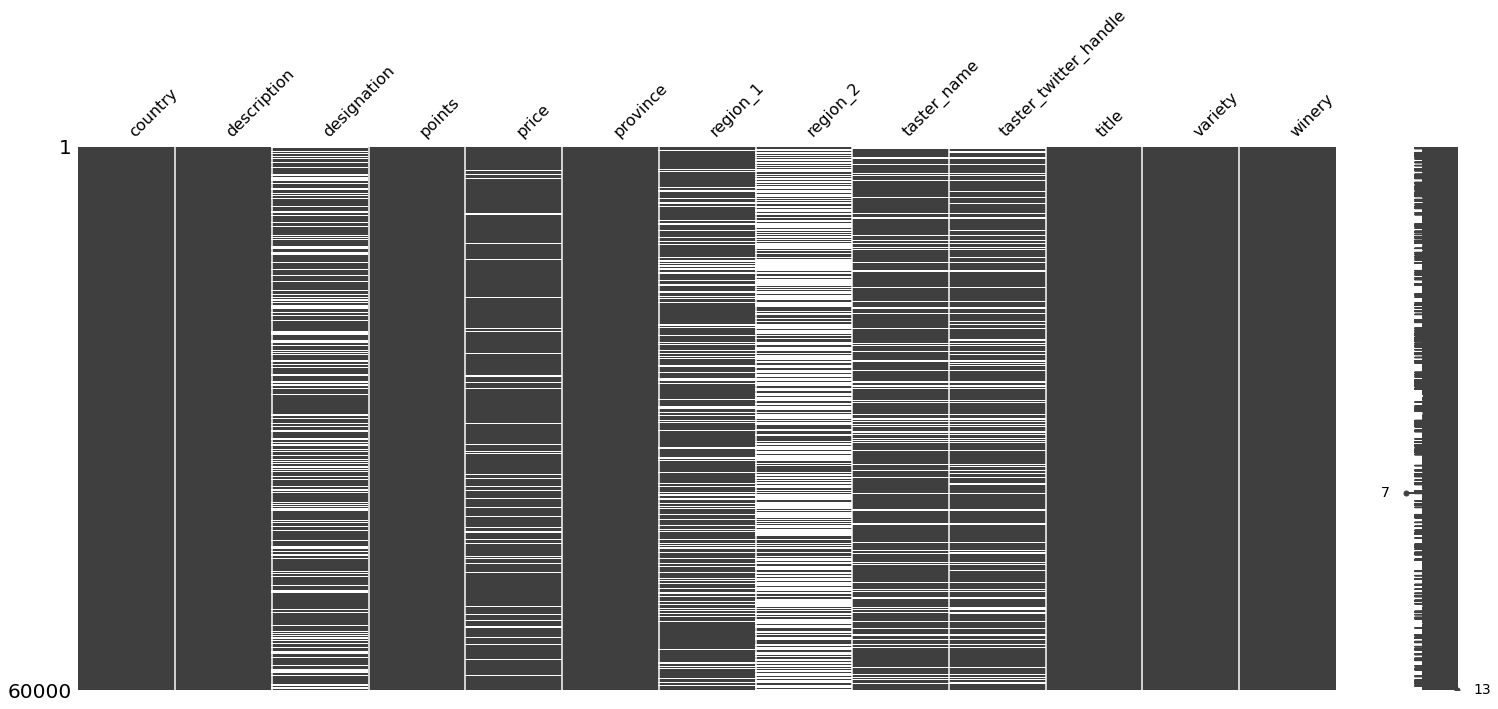

In [10]:
import missingno as msno
%matplotlib inline
ax = msno.matrix(df.sample(60000))

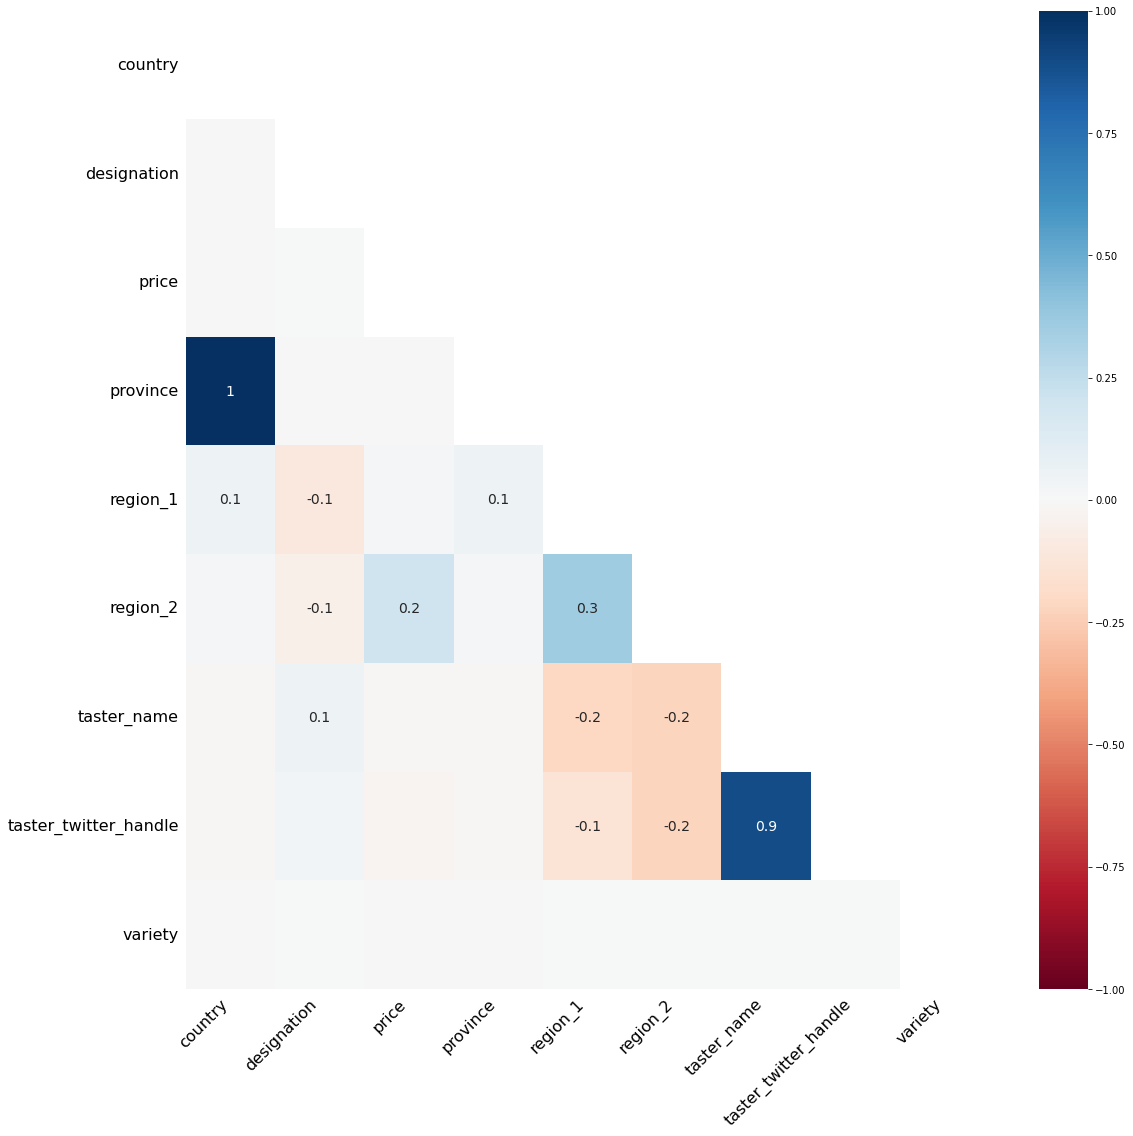

In [11]:
ax = msno.heatmap(df, figsize=(18, 18))

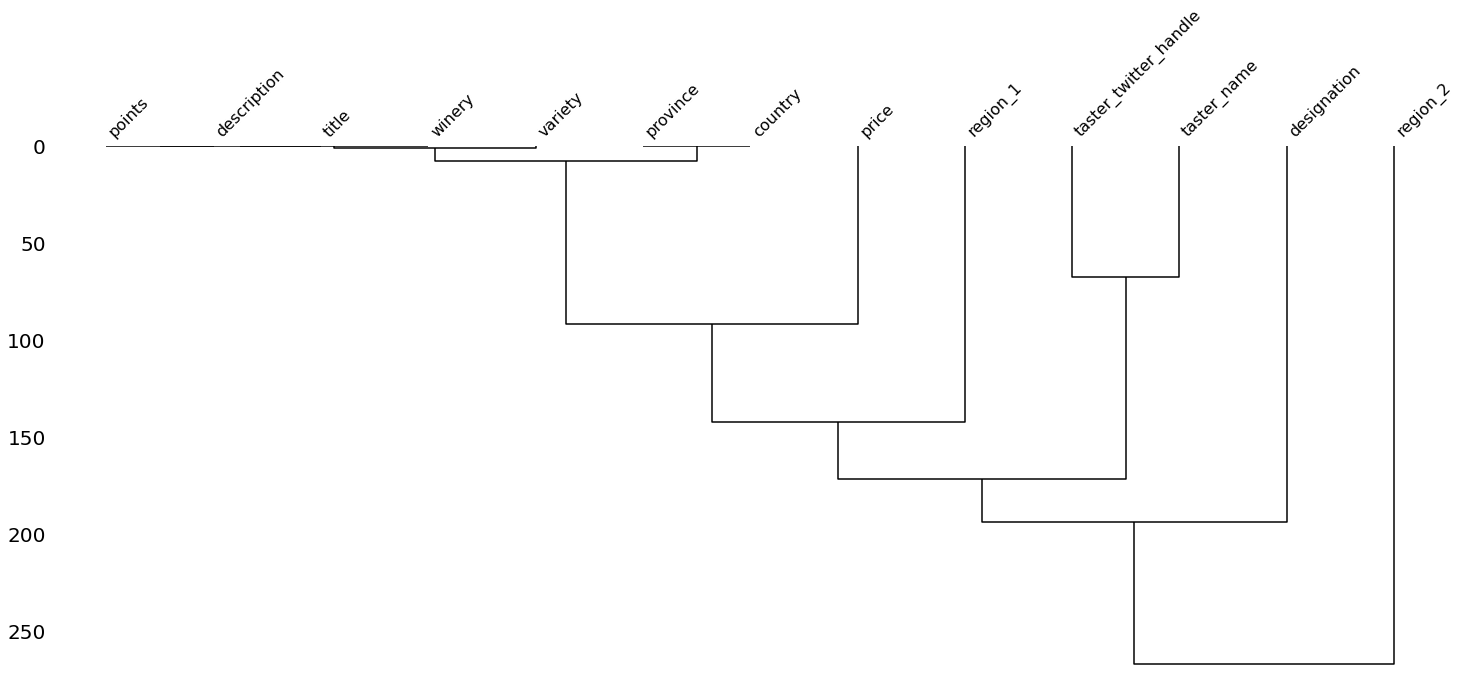

In [12]:
ax = msno.dendrogram(df)

## 1.3 Explore Target Variable

### 1.3.1 Drop rows with missing target

In [13]:
df.price.isna().sum()

8388

Around 8k obs have missing price, so we drop them

In [14]:
df = df.dropna(subset=['price'])

In [ ]:
len(df['price'].unique())

### 1.3.2 Check distribution of target var

<AxesSubplot:xlabel='price', ylabel='Count'>

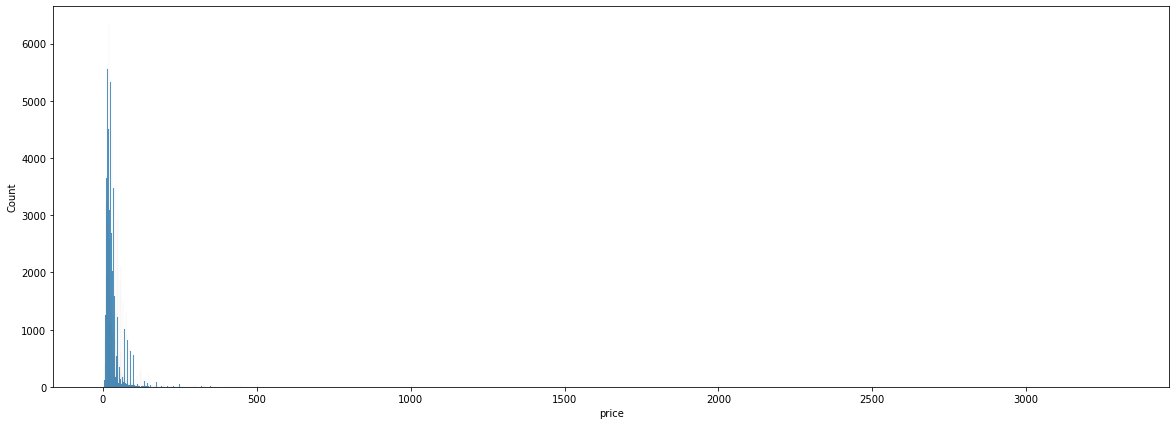

In [16]:
fig, ax = plt.subplots(figsize = (20,7))
sns.histplot(x='price',data=df)

The distrbution is very skewed

<AxesSubplot:xlabel='price', ylabel='Count'>

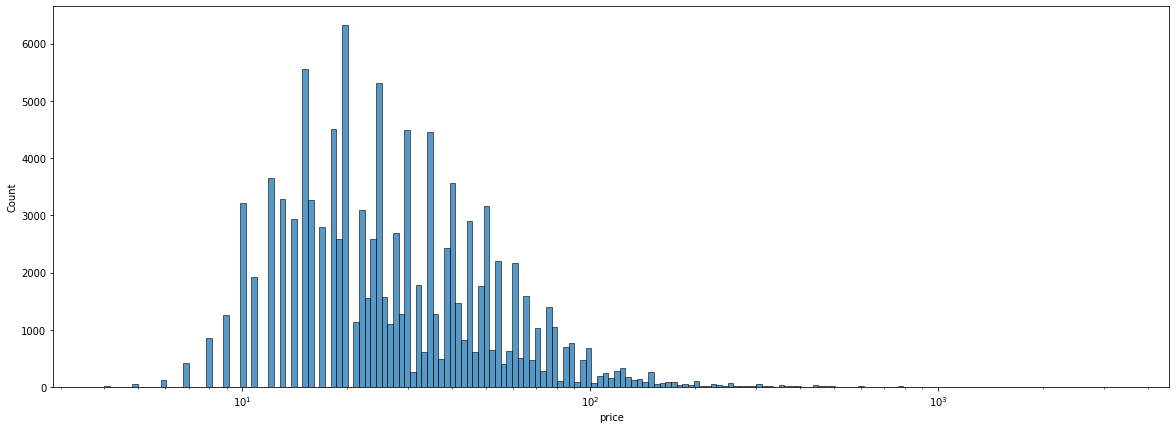

In [17]:
fig, ax = plt.subplots(figsize = (20,7))
sns.histplot(x='price',data=df,log_scale=True)

After log-transforming the distribution, we find this is more normal, but still skewed to the right due to those very  expensive wines

Most of the prices are below 200. So we zoom in to see the distribution of those which have price less than 200

<AxesSubplot:xlabel='price', ylabel='Count'>

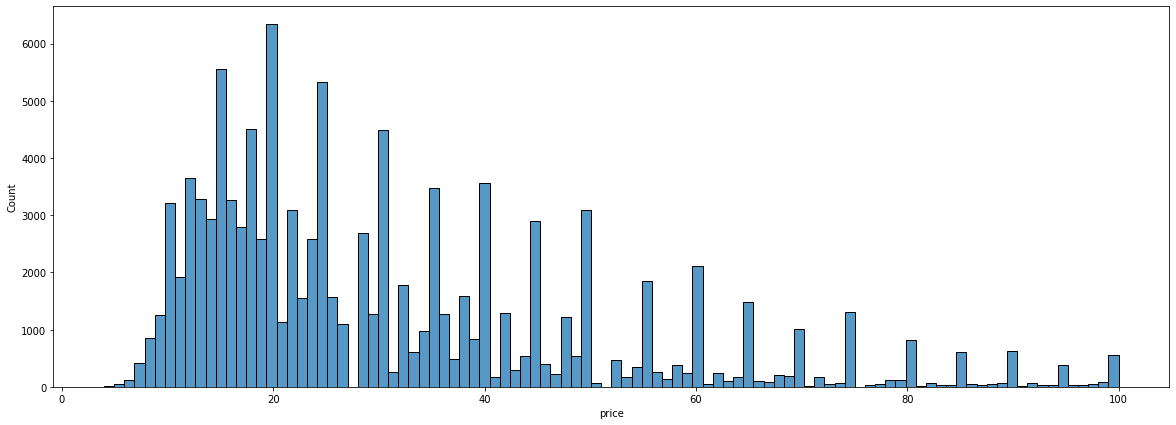

In [18]:
fig, ax = plt.subplots(figsize = (20,7))
sns.histplot(x='price',data=df[df.price<=100])

This is still very skewed. And About 97% of all wines have price less than 100. 

In [19]:
len(df[df.price<=100])/len(df) 

0.9710577500515385

## 1.4 Explore 'Country'

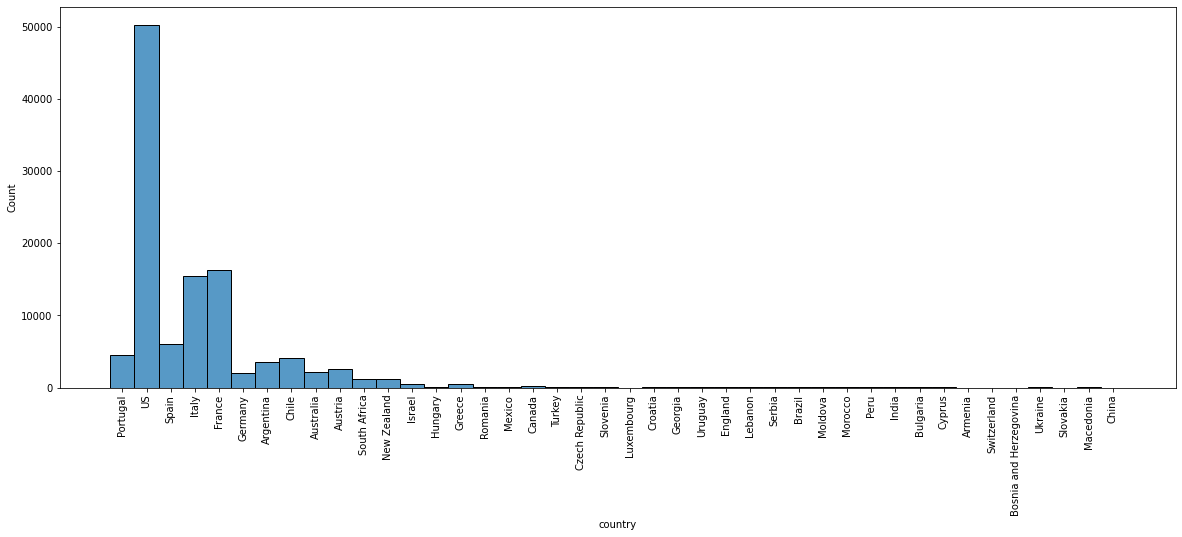

In [20]:
fig, ax = plt.subplots(figsize = (20,7))
sns.histplot(x='country',data=df)
plt.xticks(rotation = 90)
plt.show()

In [21]:
country = df.groupby('country').size().reset_index(name='count').sort_values('count', ascending=False)
px.bar(country.head(10), x='country', y='count', template='simple_white')

In [22]:
px.choropleth(country, locations = 'country', locationmode='country names', color = 'count', 
              template = 'simple_white',range_color=[2000,15000], color_continuous_scale='Viridis')

### 1.4.1 Compare against target

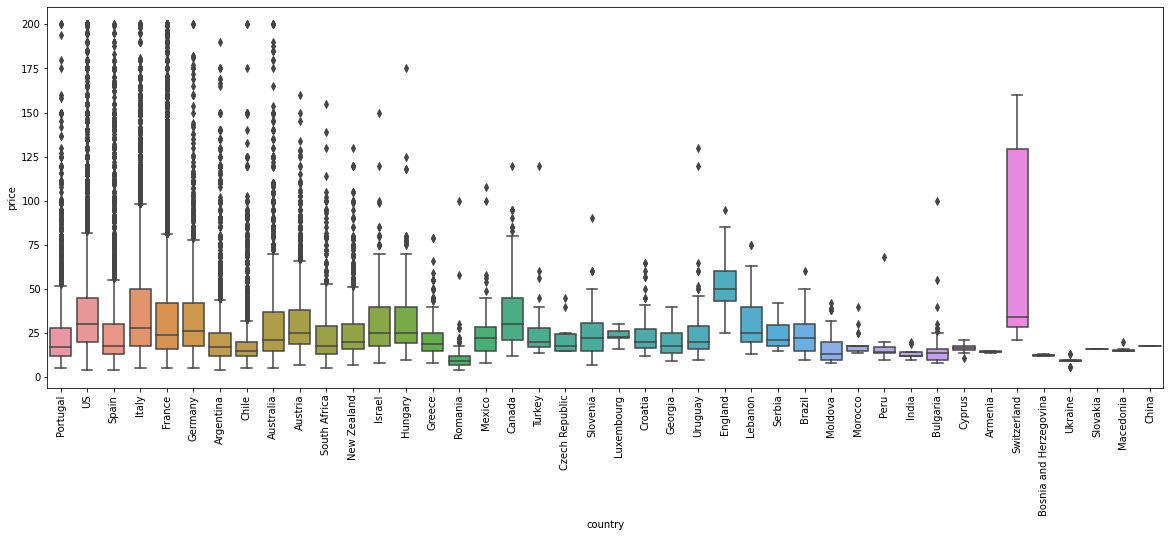

In [23]:
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='country',y='price', data=df[df.price<=200], ax = ax)
plt.xticks(rotation = 90)
plt.show()

In [24]:
df.country.isna().sum()

55

In [25]:
df.province.isna().sum()

55

Look for Na in the data. As we can see country and province have the same number of missing values. During the data exploration, it was determined that we would fill the empty country data with data from province or region, and vice versa. This wasn't possible as they were both missing for all these instances. So the missing values (only 59) were dropped. Price is the target variables so missing price rows were also dropped. Designation was also dropped as it was determined to be useless.

In [26]:
df = df.dropna(subset=['country'], inplace=False)
df = df.dropna(subset=['province'], inplace=False)

In [27]:
df.shape

(111512, 13)

## 1.5 Explore 'Designation'

In [28]:
df.designation.value_counts()

Reserve                             1844
Estate                              1217
Reserva                             1138
Estate Grown                         565
Riserva                              560
                                    ... 
Thomas T Thomas Vineyard Reserve       1
The Duke                               1
Lillian Vineyard Estate Grown          1
Viña Salort Reserva                    1
Lieu-dit Harth Cuvée Caroline          1
Name: designation, Length: 35749, dtype: int64

Desgination is too diverse with 35749 dintinct values and the most frequent one Reserve has has 1844 records out of 100k observations. So we drop this column

In [29]:
df = df.drop(columns=['designation'])

## 1.6 Explore 'Designation'

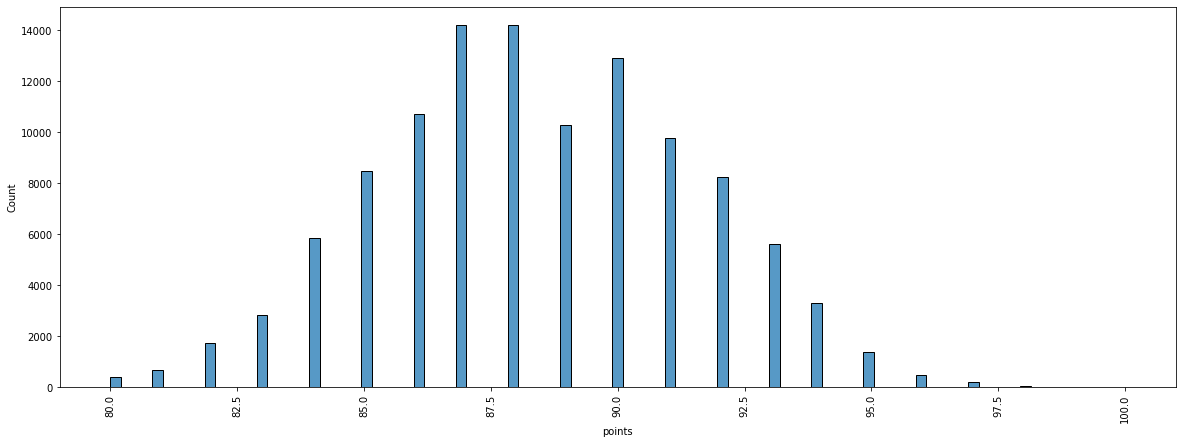

In [30]:
fig, ax = plt.subplots(figsize = (20,7))
sns.histplot(x='points',data=df)
plt.xticks(rotation = 90)
plt.show()

## 1.7 Explore 'Region 2'

In [37]:
df.region_2.isna().sum()/len(df)

0.5824754286534185

In [38]:
df.region_2.value_counts()

Central Coast        10149
Sonoma                8372
Columbia Valley       7421
Napa                  6359
Willamette Valley     3135
California Other      2497
Finger Lakes          1633
Sierra Foothills      1344
Napa-Sonoma           1083
Central Valley         988
Southern Oregon        837
Oregon Other           669
Long Island            605
North Coast            533
Washington Other       488
South Coast            241
New York Other         205
Name: region_2, dtype: int64

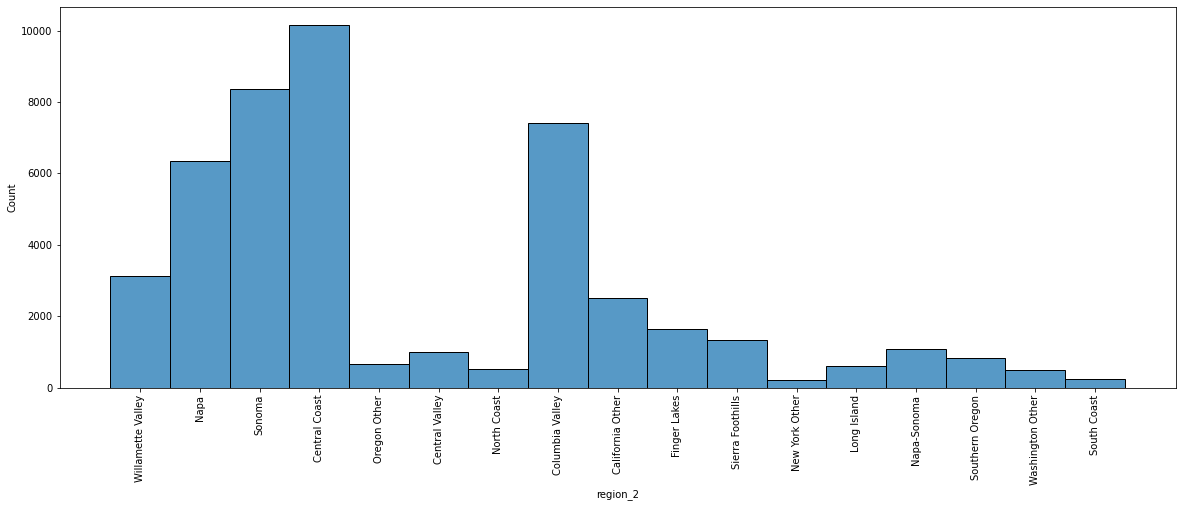

In [39]:
fig, ax = plt.subplots(figsize = (20,7))
sns.histplot(x='region_2',data=df)
plt.xticks(rotation = 90)
plt.show()

### 1.7.1 Compare against target

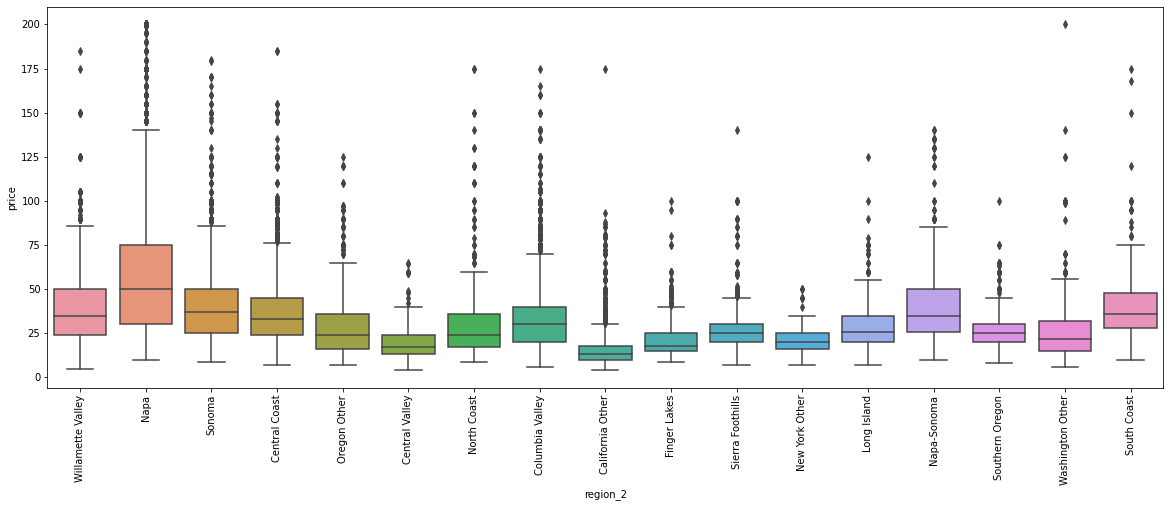

In [40]:
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='region_2',y='price', data=df[df.price<=200], ax = ax)
plt.xticks(rotation = 90)
plt.show()

From the price vs region_2 bar plot, we can see there is not much difference among the distrbutions, the medians for all region 2 are roughly between 25 and 50. And since 60% of region 2 is missing, which represent roughlt half of the dataset, it is maybe the case that the missingness is not at random. So we decide to add an indicator to missing region 2 rows.

## 1.8 Explore 'Taster Name'

In [41]:
df.taster_name.value_counts()

Roger Voss            18543
Michael Schachner     13863
Kerin O’Keefe          8872
Paul Gregutt           8836
Virginie Boone         8681
Matt Kettmann          5642
Joe Czerwinski         4642
Sean P. Sullivan       4422
Anna Lee C. Iijima     3974
Jim Gordon             3761
Anne Krebiehl MW       3027
Lauren Buzzeo          1581
Susan Kostrzewa        1005
Mike DeSimone           441
Jeff Jenssen            415
Alexander Peartree      381
Carrie Dykes            128
Fiona Adams              24
Christina Pickard         6
Name: taster_name, dtype: int64

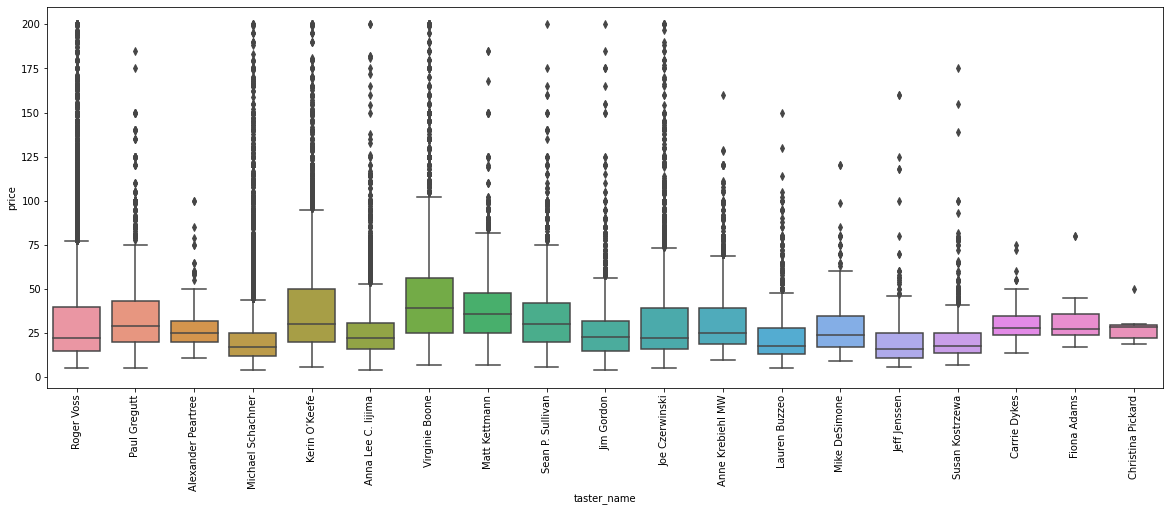

In [42]:
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='taster_name',y='price', data=df[df.price<=200], ax = ax)
plt.xticks(rotation = 90)
plt.show()

For tasters, we dummy-encode top 5 tasters and group the other tasters as others.

In [43]:
from sklearn.preprocessing import OneHotEncoder

## 1.9 Explore 'Title'

### 1.9.1 Generate Wordcloud

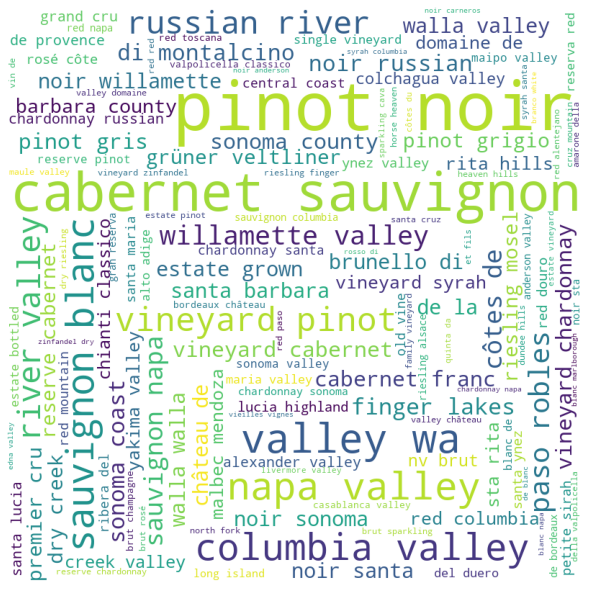

In [44]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.title:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',prefer_horizontal=0.5,
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

### 1.9.2 Extract year from title

In [45]:
def get_year(title):
    year_of_wine=title.str.extract('(\d{4})').astype('float')
    year_of_wine = year_of_wine.replace({tuple(np.arange(0,1900)):np.nan,tuple(np.arange(2020,8000)):np.nan})
    return year_of_wine

In [46]:
year = get_year(df.title)
year.columns = ['year']
year.isna().sum()

year    3964
dtype: int64

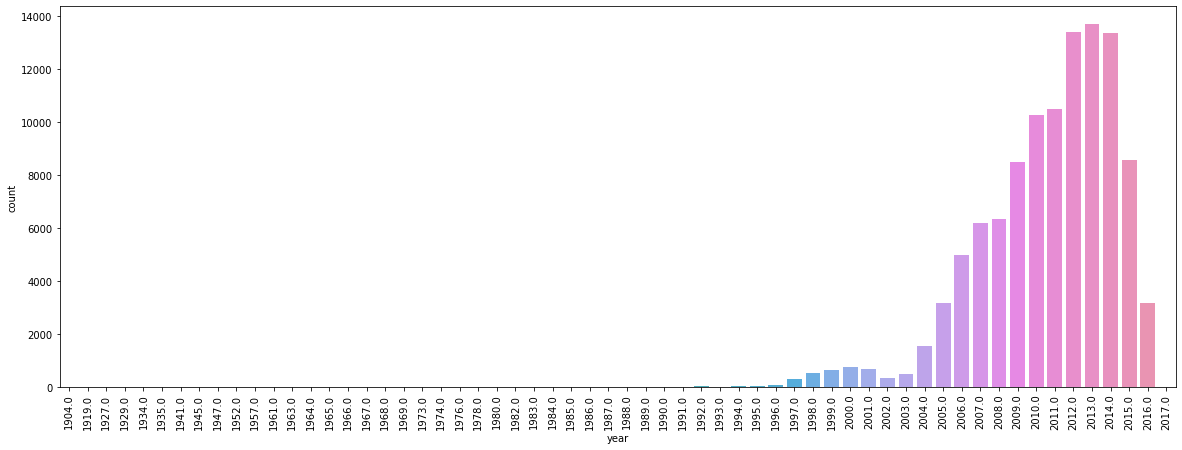

In [47]:
fig4, ax4 = plt.subplots(figsize = (20,7))
sns.countplot(x='year', data=year, ax=ax4)
plt.xticks(rotation = 90)
plt.show()

## 1.10 Explore 'Variety'

Here we create a histogram for top varieties that have more than 200 reviews

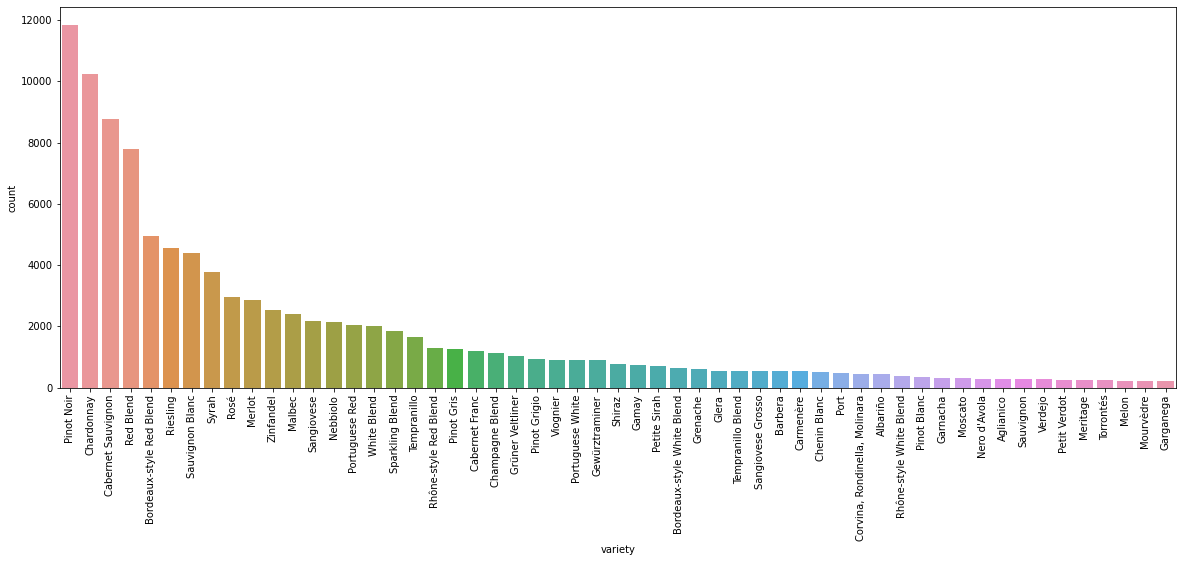

In [48]:
top_variety = df.groupby('variety').filter(lambda x: len(x) >200)
count_list = top_variety.variety.value_counts().index.tolist()
fig4, ax4 = plt.subplots(figsize = (20,7))
sns.countplot(x='variety', data=top_variety, order = count_list, ax=ax4)
plt.xticks(rotation = 90)
plt.show()

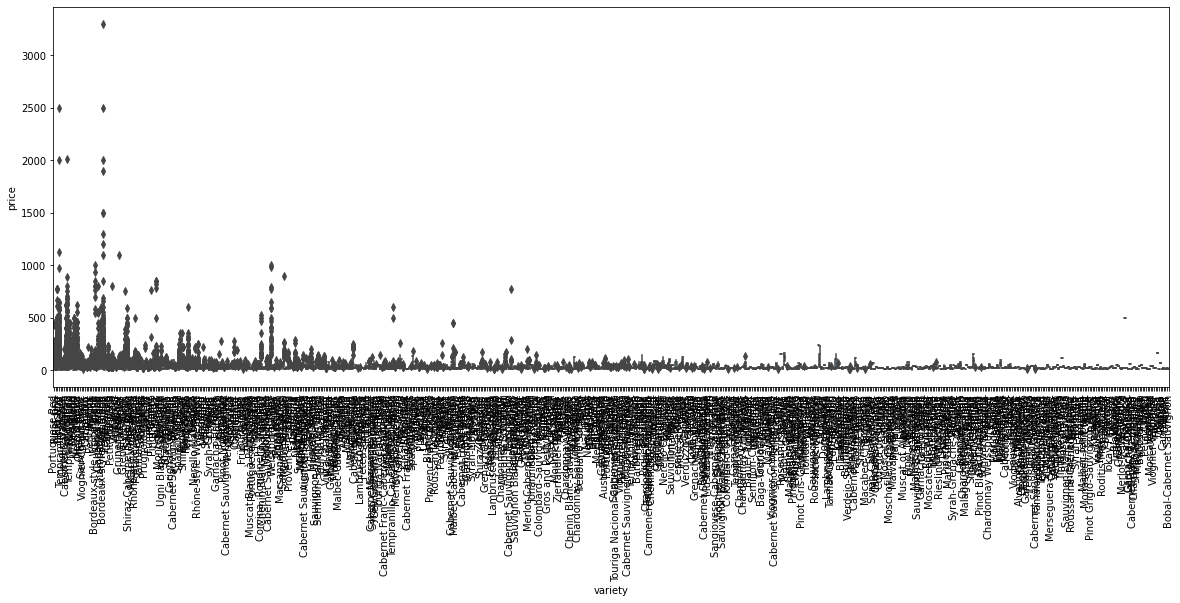

In [49]:
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='variety',y='price', data=df, ax = ax)
plt.xticks(rotation = 90)
plt.show()

# 2. Description field

## 2.1 Generate Wordcloud

In [31]:
from wordcloud import WordCloud, STOPWORDS

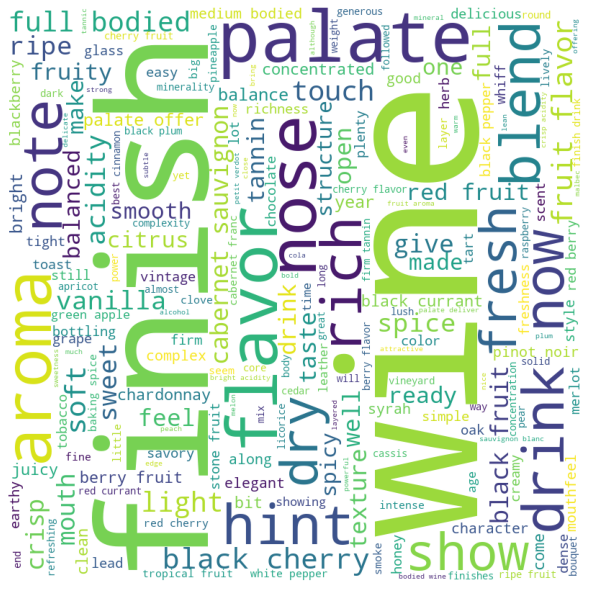

In [32]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',prefer_horizontal=0.5,
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## 2.2 Profiling Report

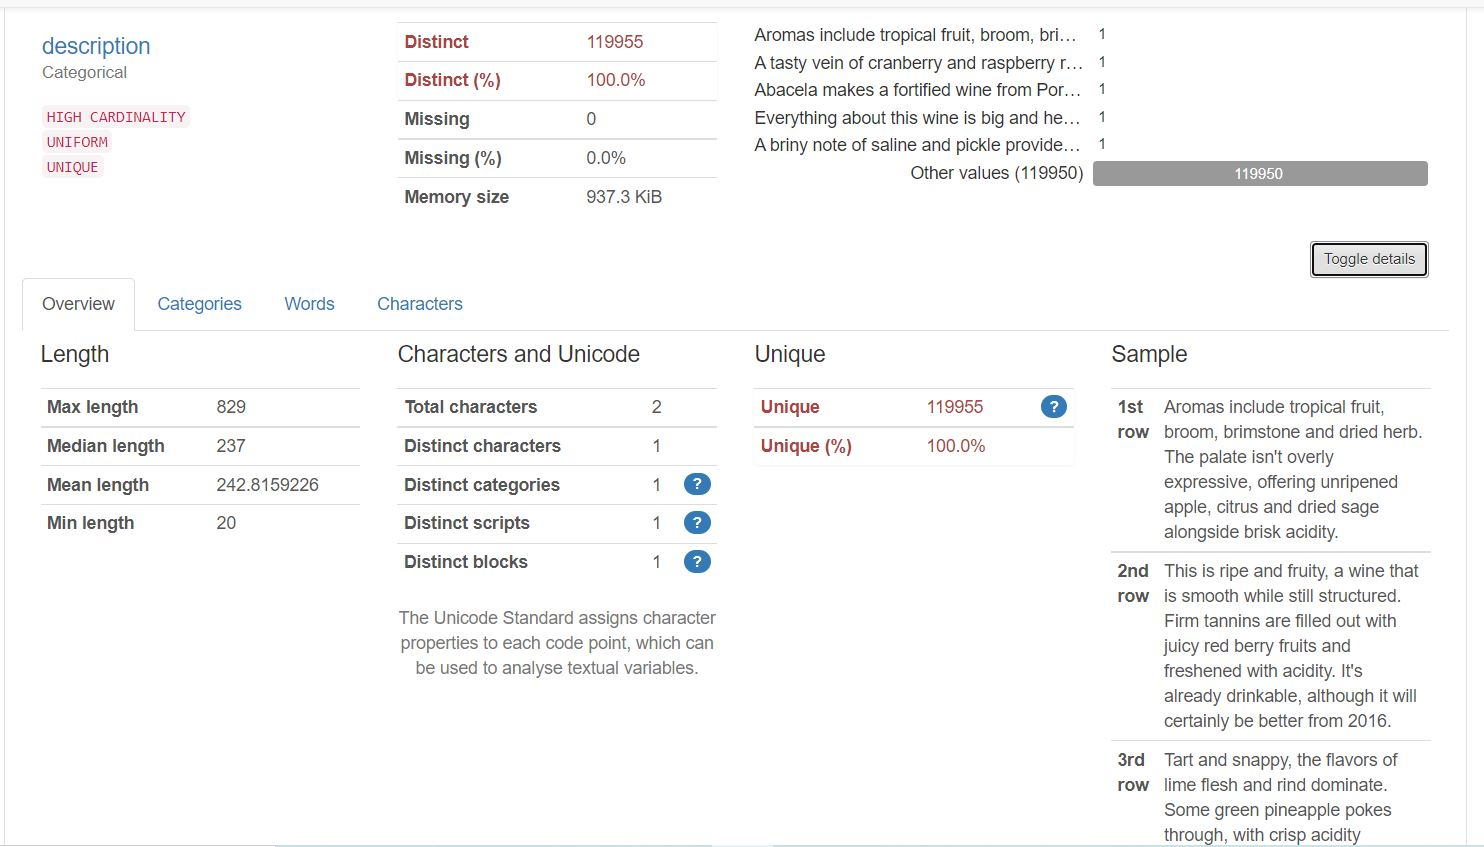

The description column has 100% unique values and the column describes the wine's texture, aroma, composition, complexity etc. This is crucial for our analysis, so we have decided to analyse the column and seggregate the decription into several columns based on the description text. The base reference is chosen using the following wine wheel descriptors.

## 2.3 Wine Aroma Wheel Descriptor

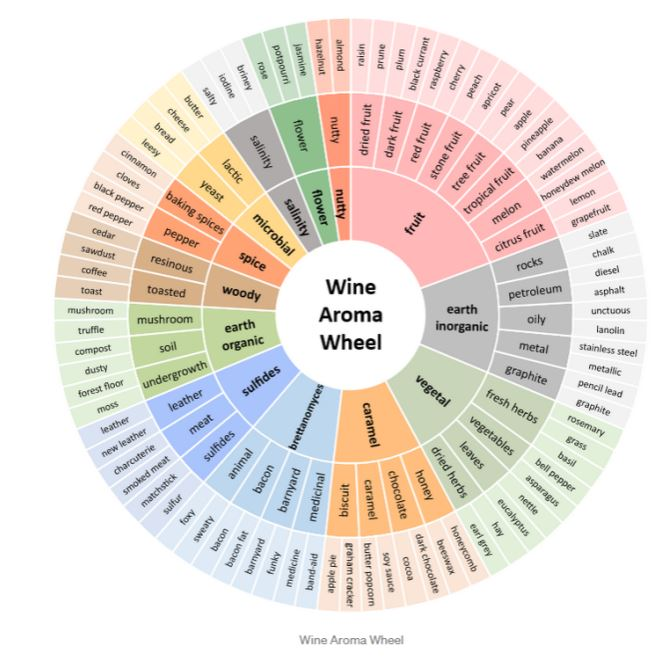

In [33]:
Wine_Aroma_Wheel =['almond', 'animal', 'apple', 'apple pie', 'apricot', 'asparagus',
       'asphalt', 'bacon', 'bacon fat', 'baking spices', 'banana',
       'band-aid', 'barnyard', 'basil', 'beeswax', 'bell pepper',
       'biscuit', 'black currant', 'black pepper', 'bread', 'briney',
       'butter', 'butter popcorn', 'caramel', 'cedar', 'chalk',
       'charcuterie', 'cheese', 'cherry', 'chocolate', 'cinnamon',
       'citrus fruit', 'cloves', 'cocoa', 'coffee', 'compost',
       'dark chocolate', 'dark fruit', 'diesel', 'dried fruit',
       'dried herbs', 'dusty', 'earl grey', 'eucalyptus', 'flower',
       'forest floor', 'foxy', 'fresh herbs', 'fruit', 'funky',
       'graham cracker', 'grapefruit', 'graphite', 'grass', 'hay',
       'hazelnut', 'herb', 'honey', 'honeycomb', 'honeydew melon',
       'iodine', 'jasmine', 'lactic', 'lanolin', 'leather', 'leaves',
       'leesy', 'lemon', 'matchstick', 'meat', 'medicinal', 'medicine',
       'melon', 'metal', 'metallic', 'moss', 'mushroom', 'nettle',
       'new leather', 'nutty', 'oily', 'peach', 'pear', 'pencil lead',
       'pepper', 'petroleum', 'pineapple', 'plum', 'potpourri', 'prune',
       'raisin', 'raspberry', 'red fruit', 'red pepper', 'resinous',
       'rocks', 'rose', 'rosemary', 'salinity', 'salty', 'sawdust',
       'slate', 'smoked meat', 'soil', 'soy sauce', 'stainless steel',
       'stone fruit', 'sulfides', 'sulfur', 'sweaty', 'toast', 'toasted',
       'tree fruit', 'tropical fruit', 'truffle', 'unctuous',
       'undergrowth', 'vegetables', 'watermelon', 'yeat']

## 2.4 Wine Non Aroma Wheel Descriptor

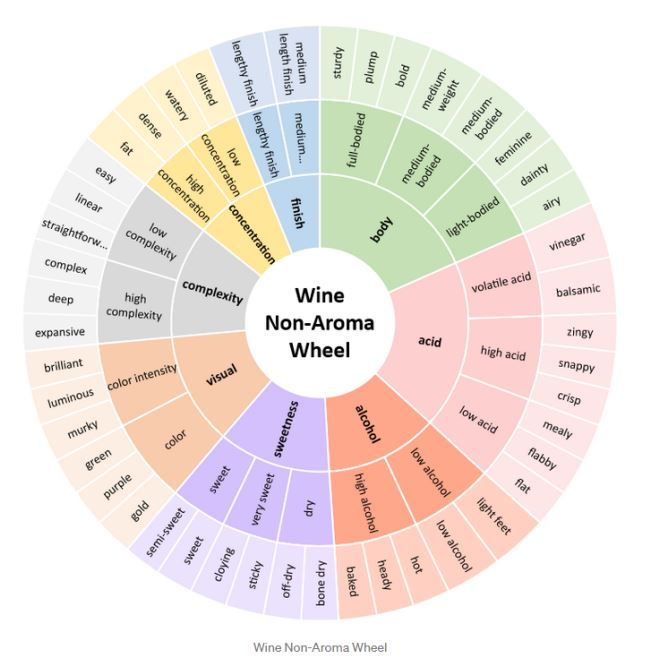

In [34]:
Wine_Non_Aroma_Wheel =['airy', 'baked', 'balsamic', 'bold', 'bone dry', 'brilliant',
       'cloying', 'color', 'color intensity', 'complex', 'crisp',
       'dainty', 'deep', 'dense', 'diluted', 'dry', 'easy', 'expansive',
       'fat', 'feminine', 'flabby', 'flat', 'full-bodied', 'gold',
       'green', 'heady', 'high acid', 'high alcohol', 'high complexity',
       'high concentration', 'hot', 'lengthy finish', 'light fleet',
       'light-bodied', 'linear', 'low acid', 'low alcohol',
       'low complexity', 'low concentration', 'luminous', 'mealy',
       'medium', 'medium length finish', 'medium-bodied', 'murky',
       'off-dry', 'plump', 'purple', 'semi-sweet', 'snappy', 'sticky',
       'straightforward', 'sturdy', 'sweet', 'very sweet', 'vinegar',
       'volatile acid', 'watery', 'zingy']

## 2.5 Remove stopwords from description and calculate frequency of words from wine wheels.

In [35]:
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ziyezhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ziyezhang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/ziyezhang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
# Create columns for the Wine Aroma descriptions
for W in Wine_Aroma_Wheel:
    df[W]=0

# Create columns for the Wine Non-Aroma descriptions
for W in Wine_Non_Aroma_Wheel:
    df[W]=0
    
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['description'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# check if the wine aroma/ wine non aroma word is present in the description. Add frequency to the corresponding column.
for j in range(len(df['description'])):
    for i in range(len(Wine_Aroma_Wheel)):
        if Wine_Aroma_Wheel[i] in df['description'].iloc[j].lower():
            df[Wine_Aroma_Wheel[i]].iat[j] =df[Wine_Aroma_Wheel[i]].iloc[j]+1
    for i1 in range(len(Wine_Non_Aroma_Wheel)):
        if Wine_Non_Aroma_Wheel[i1] in df['description'].iloc[j].lower():
            df[Wine_Non_Aroma_Wheel[i1]].iat[j] =df[Wine_Non_Aroma_Wheel[i1]].iloc[j]+1

/var/folders/87/p2fz94n545d027cv0sf9v8vw0000gn/T/ipykernel_47743/1890950539.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/87/p2fz94n545d027cv0sf9v8vw0000gn/T/ipykernel_47743/1890950539.py:7: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



# 3. Further Preprocessing

In [50]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [51]:
df.columns[0:20]

Index(['country', 'description', 'points', 'price', 'province', 'region_1',
       'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety',
       'winery', 'almond', 'animal', 'apple', 'apple pie', 'apricot',
       'asparagus', 'asphalt', 'bacon'],
      dtype='object')

In [52]:
df.columns

Index(['country', 'description', 'points', 'price', 'province', 'region_1',
       'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       ...
       'snappy', 'sticky', 'straightforward', 'sturdy', 'sweet', 'very sweet',
       'vinegar', 'volatile acid', 'watery', 'zingy'],
      dtype='object', length=191)

## 3.1 Split train/test to avoid information leakage

In [53]:
#X = df[['country', 'description', 'designation', 'points', 'province',
#       'region_1', 'region_2', 'taster_name', 'title','variety']]
X = df.drop(['description','price', 'taster_twitter_handle','winery'],axis=1)

In [54]:
y= df[['price']]

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [57]:
X_train

country  points      province                             region_1  \
129187   Spain      84       Levante                             Valencia   
26755    Italy      90      Piedmont                               Barolo   
104470      US      93    California                          Paso Robles   
70460       US      92    California                      Howell Mountain   
61832    Italy      89        Veneto  Amarone della Valpolicella Classico   
...        ...     ...           ...                                  ...   
23183   France      93  Rhône Valley                             Condrieu   
50866       US      82    California                     Alexander Valley   
47204       US      82    California                        Amador County   
48274       US      92    California                 Russian River Valley   
77308    Italy      90      Piedmont                               Barolo   

                region_2        taster_name  \
129187               NaN  Michael Schachner   
26755                NaN      Kerin O’Keefe   
104470     Central Coast      Matt Kettmann   
70460               Napa     Virginie Boone   
61832                NaN                NaN   
...                  ...                ...   
23183                NaN     Joe Czerwinski   
50866             Sonoma                NaN   
47204   Sierra Foothills                NaN   
48274             Sonoma                NaN   
77308                NaN                NaN   

                                                    title  \
129187  Pluvium 2015 Premium Selection Bobal-Cabernet ...   
26755               Sobrero 2012 Ciabot Tanasio  (Barolo)   
104470                Shale Oak 2012 Ku Red (Paso Robles)   
70460   Pine Ridge 2012 Cabernet Sauvignon (Howell Mou...   
61832   Villa Spinosa 2004  Amarone della Valpolicella...   
...                                                   ...   
23183   Michel & Stéphane Ogier 2011 La Combe de Malle...   
50866    H & G 2010 Cabernet Sauvignon (Alexander Valley)   
47204   Sobon Estate 2006 Rezerve Primitivo (Amador Co...   
48274   Williams Selyem 2005 Allen Vineyard Chardonnay...   
77308                                Parusso 2008  Barolo   

                              variety  almond  animal  ...  snappy  sticky  \
129187       Bobal-Cabernet Sauvignon       0       0  ...       0       0   
26755                        Nebbiolo       0       0  ...       0       0   
104470                      Red Blend       0       0  ...       0       0   
70460              Cabernet Sauvignon       0       0  ...       0       0   
61832   Corvina, Rondinella, Molinara       0       0  ...       0       0   
...                               ...     ...     ...  ...     ...     ...   
23183         Rhône-style White Blend       0       0  ...       0       0   
50866              Cabernet Sauvignon       0       0  ...       0       0   
47204                       Primitivo       0       0  ...       0       0   
48274                      Chardonnay       0       0  ...       0       0   
77308                        Nebbiolo       0       0  ...       0       0   

        straightforward  sturdy  sweet  very sweet  vinegar  volatile acid  \
129187                0       0      0           0        0              0   
26755                 0       0      0           0        0              0   
104470                0       0      0           0        0              0   
70460                 0       0      0           0        0              0   
61832                 0       0      0           0        0              0   
...                 ...     ...    ...         ...      ...            ...   
23183                 0       0      0           0        0              0   
50866                 0       0      0           0        0              0   
47204                 0       0      0           0        0              0   
48274                 0       0      0           0        0        

In [58]:
# country	province	region_1	region_2	taster_name	title	variety

## 3.2 Country Preprocessing: Select Top 10 Categories and Group others as Other

In [59]:
def group_country(country):
    countries = 10
    country_to_keep = country.value_counts(dropna=False)[:countries].index
    country_list = []
    for i in country:
        if i in country_to_keep:
            country_list.append(i)
        else:
            country_list.append('Other')
    return np.array(country_list).reshape((-1,1))

In [60]:
country_grouping = FunctionTransformer(func = group_country)
ohe_country = OneHotEncoder(handle_unknown='ignore')
country_grouping_pipe = make_pipeline(country_grouping,ohe_country)

## 3.3 Province Preprocessing: Select Top 20 Categories and Group others as Other

In [62]:
def group_province(province):
    provinces = 20
    province_to_keep = province.value_counts(dropna=False)[:provinces].index
    province_list = []
    for i in province:
        if i in province_to_keep:
            province_list.append(i)
        else:
            province_list.append('Other')
    return np.array(province_list).reshape((-1,1))

In [63]:
province_grouping = FunctionTransformer(func = group_province)
ohe_province = OneHotEncoder(handle_unknown='ignore')
province_grouping_pipe = make_pipeline(province_grouping,ohe_province)

## 3.4 Region 1 Preprocessing: Select Top 20 Categories and Group others as Other

In [64]:
def group_region_1(region_1):
    region_1s = 20
    region_1_to_keep = region_1.value_counts(dropna=False)[:region_1s].index
    region_1_list = []
    for i in region_1:
        if i in region_1_to_keep:
            region_1_list.append(i)
        else:
            region_1_list.append('Other')
    return np.array(region_1_list).reshape((-1,1))

In [65]:
region_1_grouping = FunctionTransformer(func = group_region_1)
ohe_region_1 = OneHotEncoder(handle_unknown='ignore')
region_1_grouping_pipe = make_pipeline(region_1_grouping,ohe_region_1)

## 3.5 Region_2 Preprocesing: Add indicator for missing values

In [66]:
def missing_indicator_region_2(region_2):
    X = pd.DataFrame()
    X['missing_region_2'] = np.where(region_2.isnull(), 1, 0)
    return X

In [67]:
region_2_missing = FunctionTransformer(func=missing_indicator_region_2)


## 3.6 Taster Preprocesing: Select top 5 tasters and group others as 'Other'

In [68]:
def group_taster(taster_name):
    tasters = 5
    tasters_to_keep = taster_name.value_counts(dropna=False)[:tasters].index
    taster_list = []
    for i in taster_name:
        if i in tasters_to_keep:
            taster_list.append(i)
        else:
            taster_list.append('Other')
    return np.array(taster_list).reshape((-1,1))
#     X = pd.DataFrame()
#     X["taster_Roger_Voss"] = np.where(taster_name=='Roger Voss', 1, 0)
#     X["taster_Michael_Schachner"] = np.where(taster_name=='Michael Schachner', 1, 0)
#     X["taster_Paul_Gregutt"] = np.where(taster_name=='Paul Gregutt', 1, 0)
#     X["taster_Virginie_Boone"] = np.where(taster_name=='Virginie Boone', 1, 0)
#     X["taster_Kerin_O’Keefe"] = np.where(taster_name=="Kerin O’Keefe", 1, 0)
#     X["taster_Other_tasters"] = np.where((taster_name!='Roger Voss')&
#                                     (taster_name!='Michael Schachner')&
#                                     (taster_name!='Paul Gregutt')&
#                                     (taster_name!='Virginie Boone')&
#                                     (taster_name!="Kerin O’Keefe"), 1, 0)
#    return X

In [69]:
taster_grouping = FunctionTransformer(func=group_taster)
ohe_taster = OneHotEncoder(handle_unknown='ignore')
taster_grouping_pipe = make_pipeline(taster_grouping,ohe_taster)

## 3.7 Title Preprocessing: Match and get the year of made in each title, and impute missing values with mean

The title contains variety and winery information and the year of the wine, so we believe extracting year from the title is enough and more importantly, we believe the year of made of a wine has a relationship with its price.

In [70]:
from sklearn.impute import SimpleImputer
impt_year = SimpleImputer(strategy='mean')

In [71]:
get_year_from_title = FunctionTransformer(func=get_year)
year_from_title = make_pipeline(get_year_from_title,impt_year)

Alternative approach using regular expression

In [72]:
# year = []
# for i in range(len(df.title)):
#     year_i = re.findall(r"\d\d\d\d",df.title.iloc[i])
#     if len(year_i) != 1:
#         year.append(np.nan)
#     else:
#         year.append(int(year_i[0]))

In [73]:
#year_from_title.fit_transform(df.title)

## 3.8 Variety Preprocessing: Select Top 20 Categories and Group others as Others

In [74]:
def group_variety(variety):
    top_20_variety = variety.value_counts()[0:20]
    variety_list = []
    for i in range(len(variety)):
        v = variety.iloc[i]
        if v not in top_20_variety:
            variety_list.append('Other')
        else:
            variety_list.append(v)
    return np.array(variety_list).reshape((-1,1))

## 3.9 Define Data Pipelines

In [75]:
variety_grouping = FunctionTransformer(func = group_variety)
ohe_variety = OneHotEncoder(handle_unknown='ignore')
variety_grouping_pipe = make_pipeline(variety_grouping,ohe_variety)

In [77]:
ct = make_column_transformer((country_grouping_pipe,'country'),
                             (province_grouping_pipe,'province'),
                             (region_1_grouping_pipe,'region_1'),
                             (region_2_missing, 'region_2'),
                             (taster_grouping_pipe,'taster_name'),
                             (year_from_title,'title'),
                             (variety_grouping_pipe,'variety'),
                             remainder='passthrough')

In [78]:
X_train_ct = ct.fit_transform(X_train)

In [79]:
ct.named_transformers_

{'pipeline-1': Pipeline(steps=[('functiontransformer',
                  FunctionTransformer(func=<function group_country at 0x7fedbb9ae700>)),
                 ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))]),
 'pipeline-2': Pipeline(steps=[('functiontransformer',
                  FunctionTransformer(func=<function group_province at 0x7fedbb9bf3a0>)),
                 ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))]),
 'pipeline-3': Pipeline(steps=[('functiontransformer',
                  FunctionTransformer(func=<function group_region_1 at 0x7fedbb9bf9d0>)),
                 ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))]),
 'functiontransformer': FunctionTransformer(func=<function missing_indicator_region_2 at 0x7fedb81a8040>),
 'pipeline-4': Pipeline(steps=[('functiontransformer',
                  FunctionTransformer(func=<function group_taster at 0x7fedb81a8700>)),
                 ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))]),
 'pi

In [80]:
names_country = ct.named_transformers_['pipeline-1']['onehotencoder'].get_feature_names_out(['country'])
names_country

array(['country_Argentina', 'country_Australia', 'country_Austria',
       'country_Chile', 'country_France', 'country_Germany',
       'country_Italy', 'country_Other', 'country_Portugal',
       'country_Spain', 'country_US'], dtype=object)

In [81]:
names_province = ct.named_transformers_['pipeline-2']['onehotencoder'].get_feature_names_out(['province'])
names_province

array(['province_Alsace', 'province_Bordeaux', 'province_Burgundy',
       'province_California', 'province_Central Italy',
       'province_Champagne', 'province_Douro', 'province_Loire Valley',
       'province_Mendoza Province', 'province_New York',
       'province_Northeastern Italy', 'province_Northern Spain',
       'province_Oregon', 'province_Other', 'province_Piedmont',
       'province_Sicily & Sardinia', 'province_South Australia',
       'province_Southwest France', 'province_Tuscany', 'province_Veneto',
       'province_Washington'], dtype=object)

In [82]:
names_region1 = ct.named_transformers_['pipeline-3']['onehotencoder'].get_feature_names_out(['region_1'])
names_region1

array(['region_1_Alsace', 'region_1_Barolo',
       'region_1_Brunello di Montalcino', 'region_1_California',
       'region_1_Carneros', 'region_1_Champagne',
       'region_1_Columbia Valley (WA)', 'region_1_Finger Lakes',
       'region_1_Mendoza', 'region_1_Napa Valley', 'region_1_Other',
       'region_1_Paso Robles', 'region_1_Rioja',
       'region_1_Russian River Valley', 'region_1_Santa Barbara County',
       'region_1_Sonoma Coast', 'region_1_Sonoma County',
       'region_1_Toscana', 'region_1_Walla Walla Valley (WA)',
       'region_1_Willamette Valley', 'region_1_nan'], dtype=object)

In [83]:
names_region_2 = ['region_2_is_missing']
names_region_2

['region_2_is_missing']

In [84]:
names_taster = ct.named_transformers_['pipeline-4']['onehotencoder'].get_feature_names_out(['taster'])
names_taster

array(['taster_Kerin O’Keefe', 'taster_Michael Schachner', 'taster_Other',
       'taster_Paul Gregutt', 'taster_Roger Voss', 'taster_nan'],
      dtype=object)

In [85]:
names_year = ['year_of_wine']
names_year

['year_of_wine']

In [86]:
names_variety = ct.named_transformers_['pipeline-6']['onehotencoder'].get_feature_names_out(['variety'])
names_variety

array(['variety_Bordeaux-style Red Blend', 'variety_Cabernet Sauvignon',
       'variety_Chardonnay', 'variety_Malbec', 'variety_Merlot',
       'variety_Nebbiolo', 'variety_Other', 'variety_Pinot Gris',
       'variety_Pinot Noir', 'variety_Portuguese Red',
       'variety_Red Blend', 'variety_Rhône-style Red Blend',
       'variety_Riesling', 'variety_Rosé', 'variety_Sangiovese',
       'variety_Sauvignon Blanc', 'variety_Sparkling Blend',
       'variety_Syrah', 'variety_Tempranillo', 'variety_White Blend',
       'variety_Zinfandel'], dtype=object)

In [87]:
# get feature names for our original features up to points
features_set1 = np.hstack((names_country, names_province,names_region1,names_region_2,
           names_taster,names_year,names_variety,['points']))
len(features_set1)

83

In [88]:
# get feature names that are generated using aroma and non-aroma wheels
features_set2 = X_train.iloc[:,X_train.columns.get_loc("almond"):].columns
len(features_set2)

179

In [89]:
features_set = np.hstack((features_set1,features_set2))
len(features_set)

262

In [90]:
X_train_ct.shape

(78058, 262)

In [91]:
y_train.shape

(78058, 1)

In [92]:
from sklearn.preprocessing import (MinMaxScaler,StandardScaler)
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

### 3.9.1 Final data pipeline with all preprocessing steps

In [93]:
preprocessing_pipeline = make_pipeline(ct,std_scaler)

In [98]:
X_train = preprocessing_pipeline.fit_transform(X_train)
X_train.shape

(78058, 262)

In [95]:
end_time = time.time()
print('The entire data visualization and preprocessing runs for {} seconds'.format(end_time-start_time))

The entire data visualization and preprocessing runs for 291.99884963035583 seconds


In [96]:
features_set

array(['country_Argentina', 'country_Australia', 'country_Austria',
       'country_Chile', 'country_France', 'country_Germany',
       'country_Italy', 'country_Other', 'country_Portugal',
       'country_Spain', 'country_US', 'province_Alsace',
       'province_Bordeaux', 'province_Burgundy', 'province_California',
       'province_Central Italy', 'province_Champagne', 'province_Douro',
       'province_Loire Valley', 'province_Mendoza Province',
       'province_New York', 'province_Northeastern Italy',
       'province_Northern Spain', 'province_Oregon', 'province_Other',
       'province_Piedmont', 'province_Sicily & Sardinia',
       'province_South Australia', 'province_Southwest France',
       'province_Tuscany', 'province_Veneto', 'province_Washington',
       'region_1_Alsace', 'region_1_Barolo',
       'region_1_Brunello di Montalcino', 'region_1_California',
       'region_1_Carneros', 'region_1_Champagne',
       'region_1_Columbia Valley (WA)', 'region_1_Finger Lakes',
 

#### Order of feature set is in line with  column order of numpy array X_train which has gone through the pipeline 

In [99]:
X_train.shape

(78058, 262)

In [100]:
features_set.shape

(262,)

In [101]:
y_train.shape

(78058, 1)

#### Benefit of pipelines is that preprocessing steps are included in the pipeline and can be treated as hyperparamters for tuning purposes. For example, the minmax scaler can be swapped for standard scaler to observe for any improvement in MSE or Accuracy.

#### Furthermore, during deployment, this methods can be used: 'preprocessing_pipeline.transform(X_test)' to streamline the entire data preproprocessing steps.